In [1]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn import preprocessing
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
dataset1=r'2.3.xlsx'
dataset=pd.read_excel(dataset1,engine='openpyxl')
dataset.head()

SiO2  Al2O3  Fe2O3   CaO   Na2O    CA V    FA V    W/S             E  \
0  67.47  26.49  10.86  1.34   7.43  497.69  213.08  0.228  5.880000e+07   
1  88.64  26.49  10.86  1.34  18.01  497.69  213.08  0.209  1.400000e+06   
2  88.64  26.49  10.86  1.34  18.01  497.69  213.08  0.209  9.800000e+06   
3  88.64  26.49  10.86  1.34  18.01  497.69  213.08  0.209  1.820000e+07   
4  88.64  26.49  10.86  1.34  18.01  497.69  213.08  0.209  8.400000e+06   

   conditioning humidity  conditioning age  type    fc  
0                     20                 7     2  17.0  
1                     20                 7     2   8.0  
2                     20                 7     2  24.0  
3                     20                 7     2  37.0  
4                     20                 7     2  20.0

In [3]:
print(dataset.shape)

(3390, 13)


In [4]:
X = dataset.loc[:, dataset.columns != 'fc']
y = dataset.loc[:, 'fc']

print(X.shape)
print(y.shape)

(3390, 12)
(3390,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test_validation, y_train, y_test_validation = train_test_split(X, y, test_size=0.40, random_state=10)
X_test,X_validation,y_test,y_validation = train_test_split(X_test_validation, y_test_validation, test_size=0.50, random_state=10)

# Random forest

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

regr_1 = RandomForestRegressor(n_estimators=821, max_depth=31, max_leaf_nodes=550, min_samples_leaf=1, 
                               min_samples_split=5, bootstrap= False, random_state=0, max_features=4)

scores = cross_val_score (regr_1, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs = -1)
print('10-fold mean RMSE:', np.mean(np.sqrt( -scores)))

10-fold mean RMSE: 6.8791184863445505


In [23]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 

def MAPE(true, pred):
    diff = np.abs(np.array(true) - np.array(pred))
    return np.mean(diff / true)

regr_1.fit(X_train, y_train)

Z1 = regr_1.predict(X_train)
Z2 = regr_1.predict(X_test)
Z3 = regr_1.predict(X_validation)
Z4 = regr_1.predict(X)

print("Training R2:", r2_score(y_train, Z1), "RMSE:", np.sqrt(mean_squared_error(y_train, Z1)),
      "MAE:", mean_absolute_error(y_train, Z1), "MAPE:", MAPE(y_train, Z1))
print("Testing R2:", r2_score(y_test, Z2), "RMSE:", np.sqrt(mean_squared_error(y_test, Z2)),
      "MAE:", mean_absolute_error(y_test, Z2), "MAPE:", MAPE(y_test, Z2))
print("Testing R2:", r2_score(y_validation, Z3), "RMSE:", np.sqrt(mean_squared_error(y_validation, Z3)),
      "MAE:", mean_absolute_error(y_validation, Z3), "MAPE:", MAPE(y_validation, Z3))
print("Testing R2:", r2_score(y, Z4), "RMSE:", np.sqrt(mean_squared_error(y, Z4)),
      "MAE:", mean_absolute_error(y, Z4), "MAPE:", MAPE(y, Z4))

Training R2: 0.9695968127547598 RMSE: 2.7487408068382275 MAE: 1.8886297717251062 MAPE: 0.07723526993334928
Testing R2: 0.8251740910621448 RMSE: 6.89731890282746 MAE: 4.511507117138956 MAPE: inf
Testing R2: 0.8542518859636093 RMSE: 5.970891922596598 MAE: 4.089690351529214 MAPE: inf
Testing R2: 0.9161723744034376 RMSE: 4.6019840605583004 MAE: 2.853417356768698 MAPE: inf


In [24]:
RF_r2,RF_RMSE,RF_MAE,RF_MAPE=[],[],[],[]
RF_r2.append(r2_score(y_train, Z1))
RF_r2.append(r2_score(y_test, Z2))
RF_r2.append(r2_score(y_validation, Z3))
RF_RMSE.append(np.sqrt(mean_squared_error(y_train, Z1)))
RF_RMSE.append(np.sqrt(mean_squared_error(y_test, Z2)))
RF_RMSE.append(np.sqrt(mean_squared_error(y_validation, Z3)))
RF_MAE.append(mean_absolute_error(y_train, Z1))
RF_MAE.append(mean_absolute_error(y_test, Z2))
RF_MAE.append(mean_absolute_error(y_validation, Z3))

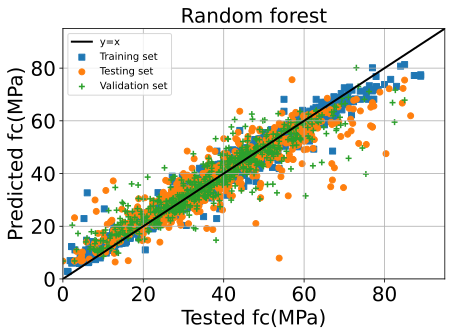

In [25]:
import matplotlib.pyplot as plt

xx = np.linspace(0, 100, 10)
yy = xx

plt.figure()
plt.plot(xx, yy, c='k', linewidth=2)
plt.scatter(y_train, Z1, marker='s')
plt.scatter(y_test, Z2, marker='o')
plt.scatter(y_validation, Z3, marker='+')

plt.grid()
plt.legend(['y=x', 'Training set', 'Testing set','Validation set'], loc = 'upper left')
plt.tick_params (axis = 'both', which = 'major')
plt.axis('tight')
plt.xlabel('Tested fc(MPa)', fontsize=20)
plt.ylabel('Predicted fc(MPa)', fontsize=20)
plt.xlim([0, 95])
plt.ylim([0, 95])
plt.title('Random forest', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('R3.svg',dpi=300,bbox_inches="tight")
plt.show()

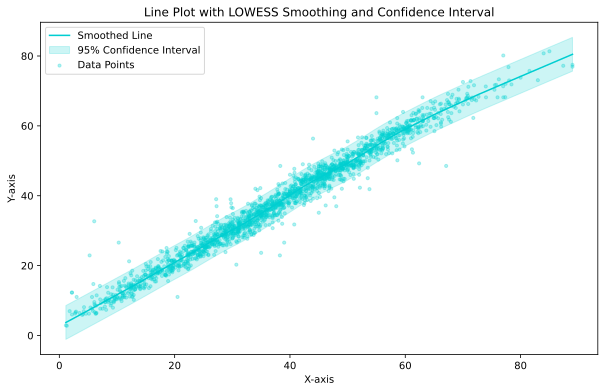

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
data = pd.DataFrame({'x': y_train, 'y': Z1})

lowess = sm.nonparametric.lowess
smoothed = lowess(Z1, y_train, frac=0.2)
x_smooth = smoothed[:, 0]
y_smooth = smoothed[:, 1]

residuals = Z1 - np.interp(y_train, x_smooth, y_smooth)
std_error = np.std(residuals)
ci = 1.96 * std_error  # 95% 置信区间

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, label='Smoothed Line', color='#00CED1')
plt.fill_between(x_smooth, y_smooth - ci, y_smooth + ci, color='#00CED1', alpha=0.2, label='95% Confidence Interval')
plt.scatter(y_train, Z1, color='#00CED1', s=10, alpha=0.3, label='Data Points', marker='o')

# 设置图形标题和标签
plt.title('Line Plot with LOWESS Smoothing and Confidence Interval')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# 显示图形
plt.savefig('R31.svg',dpi=300,bbox_inches="tight")
plt.show()

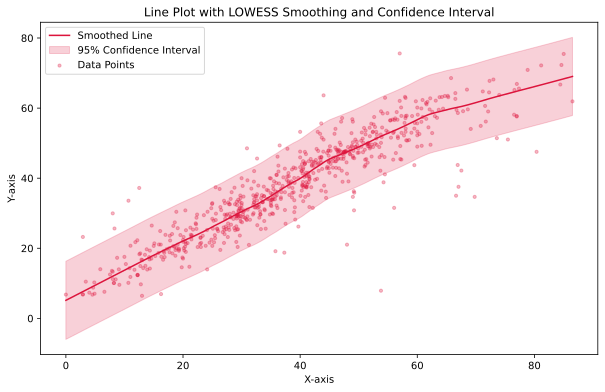

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
data = pd.DataFrame({'x': y_test, 'y': Z2})

lowess = sm.nonparametric.lowess
smoothed = lowess(Z2, y_test, frac=0.2)
x_smooth = smoothed[:, 0]
y_smooth = smoothed[:, 1]

residuals = Z2 - np.interp(y_test, x_smooth, y_smooth)
std_error = np.std(residuals)
ci = 1.96 * std_error  # 95% 置信区间

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, label='Smoothed Line', color='#DC143C')
plt.fill_between(x_smooth, y_smooth - ci, y_smooth + ci, color='#DC143C', alpha=0.2, label='95% Confidence Interval')
plt.scatter(y_test, Z2, color='#DC143C', s=10, alpha=0.3, label='Data Points', marker='o')

# 设置图形标题和标签
plt.title('Line Plot with LOWESS Smoothing and Confidence Interval')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# 显示图形
plt.savefig('R32.svg',dpi=300,bbox_inches="tight")
plt.show()

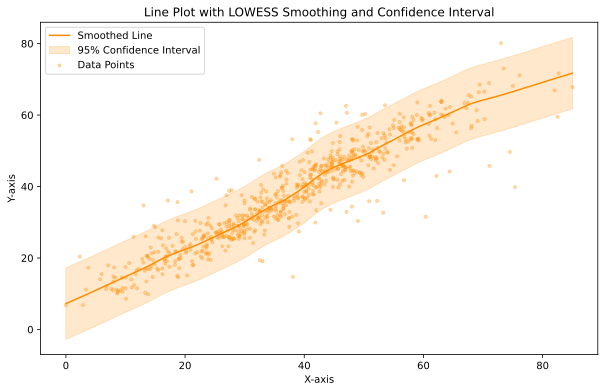

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
data = pd.DataFrame({'x': y_validation, 'y': Z3})

lowess = sm.nonparametric.lowess
smoothed = lowess(Z3, y_validation, frac=0.2)
x_smooth = smoothed[:, 0]
y_smooth = smoothed[:, 1]

residuals = Z3 - np.interp(y_validation, x_smooth, y_smooth)
std_error = np.std(residuals)
ci = 1.96 * std_error  # 95% 置信区间

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, label='Smoothed Line', color='#FF8C00')
plt.fill_between(x_smooth, y_smooth - ci, y_smooth + ci, color='#FF8C00', alpha=0.2, label='95% Confidence Interval')
plt.scatter(y_validation, Z3, color='#FF8C00', s=10, alpha=0.3, label='Data Points', marker='o')

# 设置图形标题和标签
plt.title('Line Plot with LOWESS Smoothing and Confidence Interval')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# 显示图形
plt.savefig('R33.svg',dpi=300,bbox_inches="tight")
plt.show()

# AdaBoost

In [29]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

regr_2 = AdaBoostRegressor (tree.DecisionTreeRegressor(max_depth=15, min_samples_split=2, min_samples_leaf=3,
                                                       max_leaf_nodes=265, criterion='squared_error'),
                            n_estimators=300, learning_rate=0.11, random_state=0)


scores = cross_val_score (regr_2, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs = -1)
print('10-fold mean RMSE:', np.mean(np.sqrt( -scores)))

10-fold mean RMSE: 7.235700671790158


In [30]:
regr_2.fit(X_train, y_train)

Z1 = regr_2.predict(X_train)
Z2 = regr_2.predict(X_test)
Z3 = regr_2.predict(X_validation)

print("Training R2:", r2_score(y_train, Z1), "RMSE:", np.sqrt(mean_squared_error(y_train, Z1)),
      "MAE:", mean_absolute_error(y_train, Z1), "MAPE:", MAPE(y_train, Z1))
print("Testing R2:", r2_score(y_test, Z2), "RMSE:", np.sqrt(mean_squared_error(y_test, Z2)),
      "MAE:", mean_absolute_error(y_test, Z2), "MAPE:", MAPE(y_test, Z2))
print("Testing R2:", r2_score(y_validation, Z3), "RMSE:", np.sqrt(mean_squared_error(y_validation, Z3)),
      "MAE:", mean_absolute_error(y_validation, Z3), "MAPE:", MAPE(y_validation, Z3))

Training R2: 0.9552300708029473 RMSE: 3.3355498572770594 MAE: 2.683212514333683 MAPE: 0.10906179112055449
Testing R2: 0.8033991553269497 RMSE: 7.314255023574263 MAE: 4.996963023458691 MAPE: inf
Testing R2: 0.8130687427079799 RMSE: 6.762055047077608 MAE: 4.606574037475042 MAPE: inf


In [31]:
AdaBoost_r2,AdaBoost_RMSE,AdaBoost_MAE,AdaBoost_MAPE=[],[],[],[]
AdaBoost_r2.append(r2_score(y_train, Z1))
AdaBoost_r2.append(r2_score(y_test, Z2))
AdaBoost_r2.append(r2_score(y_validation, Z3))
AdaBoost_RMSE.append(np.sqrt(mean_squared_error(y_train, Z1)))
AdaBoost_RMSE.append(np.sqrt(mean_squared_error(y_test, Z2)))
AdaBoost_RMSE.append(np.sqrt(mean_squared_error(y_validation, Z3)))
AdaBoost_MAE.append(mean_absolute_error(y_train, Z1))
AdaBoost_MAE.append(mean_absolute_error(y_test, Z2))
AdaBoost_MAE.append(mean_absolute_error(y_validation, Z3))

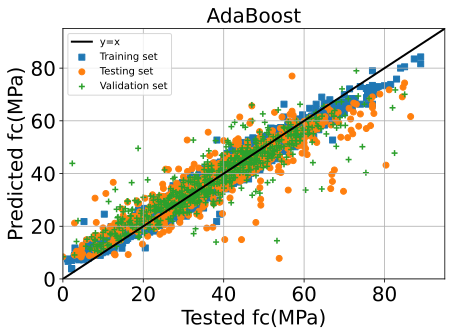

In [32]:
xx = np.linspace(0, 100, 10)
yy = xx

plt.figure()
plt.plot(xx, yy, c='k', linewidth=2)
plt.scatter(y_train, Z1, marker='s')
plt.scatter(y_test, Z2, marker='o')
plt.scatter(y_validation, Z3, marker='+')

plt.grid()
plt.legend(['y=x', 'Training set', 'Testing set','Validation set'], loc = 'upper left')
plt.tick_params (axis = 'both', which = 'major')
plt.axis('tight')
plt.xlabel('Tested fc(MPa)', fontsize=20)
plt.ylabel('Predicted fc(MPa)', fontsize=20)
plt.xlim([0, 95])
plt.ylim([0, 95])
plt.title('AdaBoost', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('A3.svg',dpi=300,bbox_inches="tight")
plt.show()

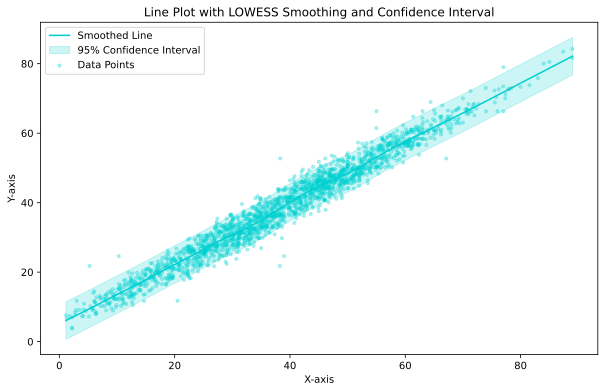

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
data = pd.DataFrame({'x': y_train, 'y': Z1})

lowess = sm.nonparametric.lowess
smoothed = lowess(Z1, y_train, frac=0.2)
x_smooth = smoothed[:, 0]
y_smooth = smoothed[:, 1]

residuals = Z1 - np.interp(y_train, x_smooth, y_smooth)
std_error = np.std(residuals)
ci = 1.96 * std_error  # 95% 置信区间

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, label='Smoothed Line', color='#00CED1')
plt.fill_between(x_smooth, y_smooth - ci, y_smooth + ci, color='#00CED1', alpha=0.2, label='95% Confidence Interval')
plt.scatter(y_train, Z1, color='#00CED1', s=10, alpha=0.3, label='Data Points', marker='o')

# 设置图形标题和标签
plt.title('Line Plot with LOWESS Smoothing and Confidence Interval')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# 显示图形
plt.savefig('A31.svg',dpi=300,bbox_inches="tight")
plt.show()

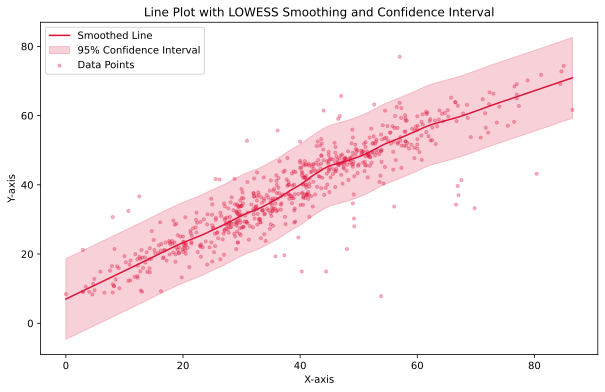

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
data = pd.DataFrame({'x': y_test, 'y': Z2})

lowess = sm.nonparametric.lowess
smoothed = lowess(Z2, y_test, frac=0.2)
x_smooth = smoothed[:, 0]
y_smooth = smoothed[:, 1]

residuals = Z2 - np.interp(y_test, x_smooth, y_smooth)
std_error = np.std(residuals)
ci = 1.96 * std_error  # 95% 置信区间

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, label='Smoothed Line', color='#DC143C')
plt.fill_between(x_smooth, y_smooth - ci, y_smooth + ci, color='#DC143C', alpha=0.2, label='95% Confidence Interval')
plt.scatter(y_test, Z2, color='#DC143C', s=10, alpha=0.3, label='Data Points', marker='o')

# 设置图形标题和标签
plt.title('Line Plot with LOWESS Smoothing and Confidence Interval')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()


# 显示图形
plt.savefig('A32.svg',dpi=300,bbox_inches="tight")
plt.show()

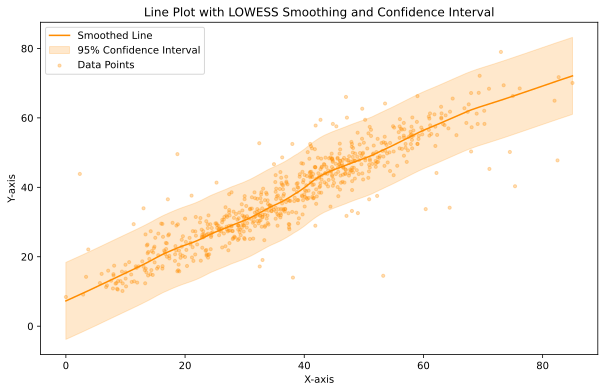

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
data = pd.DataFrame({'x': y_validation, 'y': Z3})

lowess = sm.nonparametric.lowess
smoothed = lowess(Z3, y_validation, frac=0.2)
x_smooth = smoothed[:, 0]
y_smooth = smoothed[:, 1]

residuals = Z3 - np.interp(y_validation, x_smooth, y_smooth)
std_error = np.std(residuals)
ci = 1.96 * std_error  # 95% 置信区间

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, label='Smoothed Line', color='#FF8C00')
plt.fill_between(x_smooth, y_smooth - ci, y_smooth + ci, color='#FF8C00', alpha=0.2, label='95% Confidence Interval')
plt.scatter(y_validation, Z3, color='#FF8C00', s=10, alpha=0.3, label='Data Points', marker='o')

# 设置图形标题和标签
plt.title('Line Plot with LOWESS Smoothing and Confidence Interval')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()


# 显示图形
plt.savefig('A33.svg',dpi=300,bbox_inches="tight")
plt.show()

# GBRT

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

regr_3 = GradientBoostingRegressor(n_estimators=356, learning_rate=0.15, max_depth=51, min_samples_leaf=7,
                                   min_samples_split=2, random_state=0, loss='squared_error')

scores = cross_val_score (regr_3, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs = -1)
print('10-fold mean RMSE:', np.mean(np.sqrt( -scores)))

10-fold mean RMSE: 6.878739390428312


In [38]:
regr_3.fit(X_train, y_train)

Z1 = regr_3.predict(X_train)
Z2 = regr_3.predict(X_test)
Z3 = regr_3.predict(X_validation)

print("Training R2:", r2_score(y_train, Z1), "RMSE:", np.sqrt(mean_squared_error(y_train, Z1)),
      "MAE:", mean_absolute_error(y_train, Z1), "MAPE:", MAPE(y_train, Z1))
print("Testing R2:", r2_score(y_test, Z2), "RMSE:", np.sqrt(mean_squared_error(y_test, Z2)),
      "MAE:", mean_absolute_error(y_test, Z2), "MAPE:", MAPE(y_test, Z2))
print("Testing R2:", r2_score(y_validation, Z3), "RMSE:", np.sqrt(mean_squared_error(y_validation, Z3)),
      "MAE:", mean_absolute_error(y_validation, Z3), "MAPE:", MAPE(y_validation, Z3))

Training R2: 0.9942155271511508 RMSE: 1.198963953137267 MAE: 0.27664527602597455 MAPE: 0.011436058888772109
Testing R2: 0.8175989394186132 RMSE: 7.045163697324806 MAE: 4.281037215999739 MAPE: inf
Testing R2: 0.8383565572228484 RMSE: 6.288061551556759 MAE: 3.8927482126743844 MAPE: inf


In [39]:
GBRT_r2,GBRT_RMSE,GBRT_MAE,GBRT_MAPE=[],[],[],[]
GBRT_r2.append(r2_score(y_train, Z1))
GBRT_r2.append(r2_score(y_test, Z2))
GBRT_r2.append(r2_score(y_validation, Z3))
GBRT_RMSE.append(np.sqrt(mean_squared_error(y_train, Z1)))
GBRT_RMSE.append(np.sqrt(mean_squared_error(y_test, Z2)))
GBRT_RMSE.append(np.sqrt(mean_squared_error(y_validation, Z3)))
GBRT_MAE.append(mean_absolute_error(y_train, Z1))
GBRT_MAE.append(mean_absolute_error(y_test, Z2))
GBRT_MAE.append(mean_absolute_error(y_validation, Z3))

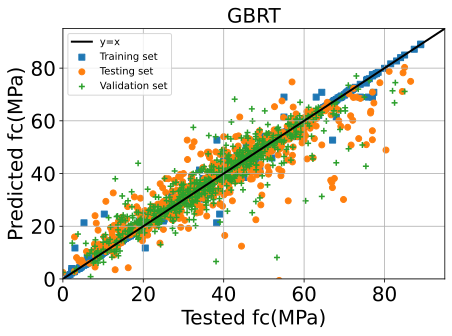

In [40]:
xx = np.linspace(0, 100, 10)
yy = xx

plt.figure()
plt.plot(xx, yy, c='k', linewidth=2)
plt.scatter(y_train, Z1, marker='s')
plt.scatter(y_test, Z2, marker='o')
plt.scatter(y_validation, Z3, marker='+')

plt.grid()
plt.legend(['y=x', 'Training set', 'Testing set','Validation set'], loc = 'upper left')
plt.tick_params (axis = 'both', which = 'major')
plt.axis('tight')
plt.xlabel('Tested fc(MPa)', fontsize=20)
plt.ylabel('Predicted fc(MPa)', fontsize=20)
plt.xlim([0, 95])
plt.ylim([0, 95])
plt.title('GBRT', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('G3.svg',dpi=300,bbox_inches="tight")
plt.show()

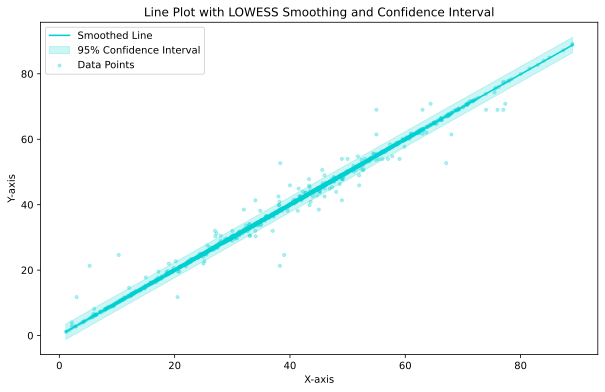

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
data = pd.DataFrame({'x': y_train, 'y': Z1})

lowess = sm.nonparametric.lowess
smoothed = lowess(Z1, y_train, frac=0.2)
x_smooth = smoothed[:, 0]
y_smooth = smoothed[:, 1]

residuals = Z1 - np.interp(y_train, x_smooth, y_smooth)
std_error = np.std(residuals)
ci = 1.96 * std_error  # 95% 置信区间

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, label='Smoothed Line', color='#00CED1')
plt.fill_between(x_smooth, y_smooth - ci, y_smooth + ci, color='#00CED1', alpha=0.2, label='95% Confidence Interval')
plt.scatter(y_train, Z1, color='#00CED1', s=10, alpha=0.3, label='Data Points', marker='o')

# 设置图形标题和标签
plt.title('Line Plot with LOWESS Smoothing and Confidence Interval')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# 显示图形
plt.savefig('G31.svg',dpi=300,bbox_inches="tight")
plt.show()

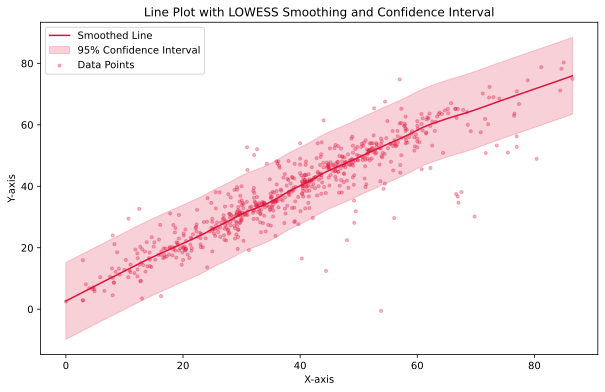

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
data = pd.DataFrame({'x': y_test, 'y': Z2})

lowess = sm.nonparametric.lowess
smoothed = lowess(Z2, y_test, frac=0.2)
x_smooth = smoothed[:, 0]
y_smooth = smoothed[:, 1]

residuals = Z2 - np.interp(y_test, x_smooth, y_smooth)
std_error = np.std(residuals)
ci = 1.96 * std_error  # 95% 置信区间

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, label='Smoothed Line', color='#DC143C')
plt.fill_between(x_smooth, y_smooth - ci, y_smooth + ci, color='#DC143C', alpha=0.2, label='95% Confidence Interval')
plt.scatter(y_test, Z2, color='#DC143C', s=10, alpha=0.3, label='Data Points', marker='o')

# 设置图形标题和标签
plt.title('Line Plot with LOWESS Smoothing and Confidence Interval')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# 显示图形
plt.savefig('G32.svg',dpi=300,bbox_inches="tight")
plt.show()

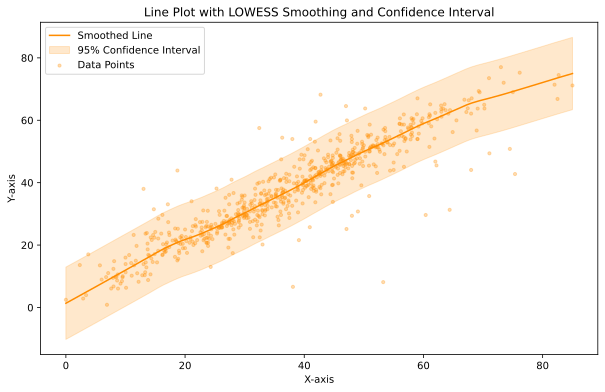

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
data = pd.DataFrame({'x': y_validation, 'y': Z3})

lowess = sm.nonparametric.lowess
smoothed = lowess(Z3, y_validation, frac=0.2)
x_smooth = smoothed[:, 0]
y_smooth = smoothed[:, 1]

residuals = Z3 - np.interp(y_validation, x_smooth, y_smooth)
std_error = np.std(residuals)
ci = 1.96 * std_error  # 95% 置信区间

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, label='Smoothed Line', color='#FF8C00')
plt.fill_between(x_smooth, y_smooth - ci, y_smooth + ci, color='#FF8C00', alpha=0.2, label='95% Confidence Interval')
plt.scatter(y_validation, Z3, color='#FF8C00', s=10, alpha=0.3, label='Data Points', marker='o')

# 设置图形标题和标签
plt.title('Line Plot with LOWESS Smoothing and Confidence Interval')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# 显示图形
plt.savefig('G33.svg',dpi=300,bbox_inches="tight")
plt.show()

# XGBoost

In [44]:
regr_4 = xgb.XGBRegressor (max_depth=27, learning_rate=0.02, n_estimators=736, colsample_bytree=1, 
                           subsample=0.77, gamma=0, random_state=0)

scores = cross_val_score (regr_4, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs = -1)
print('10-fold mean RMSE:', np.mean(np.sqrt( -scores)))

10-fold mean RMSE: 6.679215898763883


In [45]:
regr_4.fit(X_train, y_train)

Z1 = regr_4.predict(X_train)
Z2 = regr_4.predict(X_test)
Z3 = regr_4.predict(X_validation)
Z4 = regr_4.predict(X)
print("Training R2:", r2_score(y_train, Z1), "RMSE:", np.sqrt(mean_squared_error(y_train, Z1)),
      "MAE:", mean_absolute_error(y_train, Z1), "MAPE:", MAPE(y_train, Z1))
print("Testing R2:", r2_score(y_test, Z2), "RMSE:", np.sqrt(mean_squared_error(y_test, Z2)),
      "MAE:", mean_absolute_error(y_test, Z2), "MAPE:", MAPE(y_test, Z2))
print("Testing R2:", r2_score(y_validation, Z3), "RMSE:", np.sqrt(mean_squared_error(y_validation, Z3)),
      "MAE:", mean_absolute_error(y_validation, Z3), "MAPE:", MAPE(y_validation, Z3))
print("Testing R2:", r2_score(y, Z4), "RMSE:", np.sqrt(mean_squared_error(y, Z4)),
      "MAE:", mean_absolute_error(y, Z4), "MAPE:", MAPE(y, Z4))

Training R2: 0.9946513692371873 RMSE: 1.1529103598502455 MAE: 0.20389138207947424 MAPE: 0.008350269170848912
Testing R2: 0.8339255269573727 RMSE: 6.722469654970405 MAE: 3.9017754568101646 MAPE: inf
Testing R2: 0.844774778731191 RMSE: 6.16196010417433 MAE: 3.7212009959818477 MAPE: inf
Testing R2: 0.9310095247445775 RMSE: 4.174900177991903 MAE: 1.6469301198060868 MAPE: inf


In [46]:
XGBoost_r2,XGBoost_RMSE,XGBoost_MAE,XGBoost_MAPE=[],[],[],[]
XGBoost_r2.append(r2_score(y_train, Z1))
XGBoost_r2.append(r2_score(y_test, Z2))
XGBoost_r2.append(r2_score(y_validation, Z3))
XGBoost_RMSE.append(np.sqrt(mean_squared_error(y_train, Z1)))
XGBoost_RMSE.append(np.sqrt(mean_squared_error(y_test, Z2)))
XGBoost_RMSE.append(np.sqrt(mean_squared_error(y_validation, Z3)))
XGBoost_MAE.append(mean_absolute_error(y_train, Z1))
XGBoost_MAE.append(mean_absolute_error(y_test, Z2))
XGBoost_MAE.append(mean_absolute_error(y_validation, Z3))

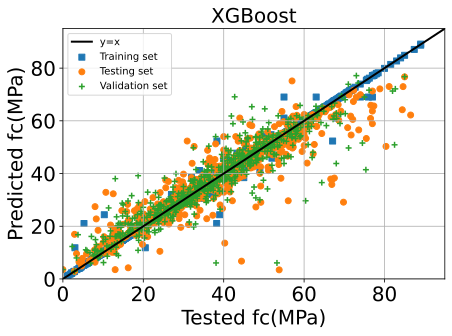

In [47]:
xx = np.linspace(0, 100, 10)
yy = xx

plt.figure()
plt.plot(xx, yy, c='k', linewidth=2)
plt.scatter(y_train, Z1, marker='s')
plt.scatter(y_test, Z2, marker='o')
plt.scatter(y_validation, Z3, marker='+')

plt.grid()
plt.legend(['y=x', 'Training set', 'Testing set','Validation set'], loc = 'upper left')
plt.tick_params (axis = 'both', which = 'major')
plt.axis('tight')
plt.xlabel('Tested fc(MPa)', fontsize=20)
plt.ylabel('Predicted fc(MPa)', fontsize=20)
plt.xlim([0, 95])
plt.ylim([0, 95])
plt.title('XGBoost', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('X3.svg',dpi=300,bbox_inches="tight")
plt.show()

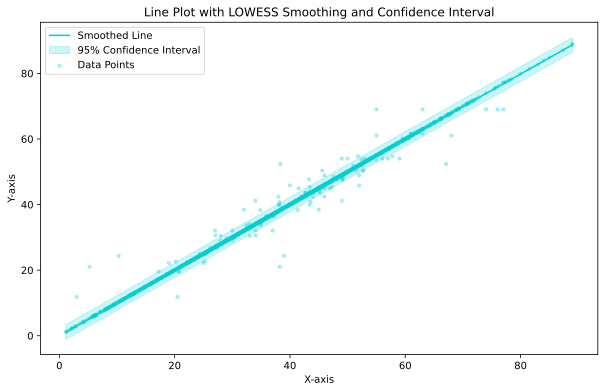

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
data = pd.DataFrame({'x': y_train, 'y': Z1})

lowess = sm.nonparametric.lowess
smoothed = lowess(Z1, y_train, frac=0.2)
x_smooth = smoothed[:, 0]
y_smooth = smoothed[:, 1]

residuals = Z1 - np.interp(y_train, x_smooth, y_smooth)
std_error = np.std(residuals)
ci = 1.96 * std_error  # 95% 置信区间

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, label='Smoothed Line', color='#00CED1')
plt.fill_between(x_smooth, y_smooth - ci, y_smooth + ci, color='#00CED1', alpha=0.2, label='95% Confidence Interval')
plt.scatter(y_train, Z1, color='#00CED1', s=10, alpha=0.3, label='Data Points', marker='o')

# 设置图形标题和标签
plt.title('Line Plot with LOWESS Smoothing and Confidence Interval')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# 显示图形
plt.savefig('X31.svg',dpi=300,bbox_inches="tight")
plt.show()

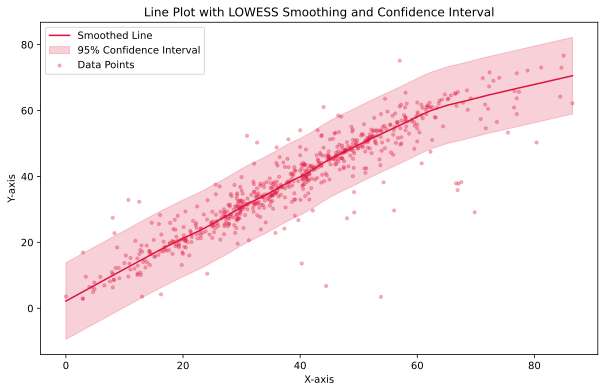

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
data = pd.DataFrame({'x': y_test, 'y': Z2})

lowess = sm.nonparametric.lowess
smoothed = lowess(Z2, y_test, frac=0.2)
x_smooth = smoothed[:, 0]
y_smooth = smoothed[:, 1]

residuals = Z2 - np.interp(y_test, x_smooth, y_smooth)
std_error = np.std(residuals)
ci = 1.96 * std_error  # 95% 置信区间

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, label='Smoothed Line', color='#DC143C')
plt.fill_between(x_smooth, y_smooth - ci, y_smooth + ci, color='#DC143C', alpha=0.2, label='95% Confidence Interval')
plt.scatter(y_test, Z2, color='#DC143C', s=10, alpha=0.3, label='Data Points', marker='o')

# 设置图形标题和标签
plt.title('Line Plot with LOWESS Smoothing and Confidence Interval')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# 显示图形
plt.savefig('X32.svg',dpi=300,bbox_inches="tight")
plt.show()

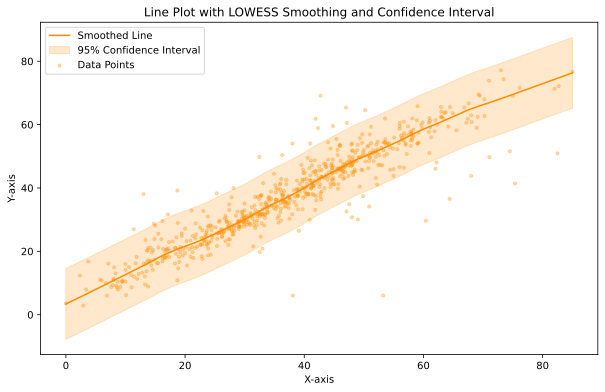

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
data = pd.DataFrame({'x': y_validation, 'y': Z3})

lowess = sm.nonparametric.lowess
smoothed = lowess(Z3, y_validation, frac=0.2)
x_smooth = smoothed[:, 0]
y_smooth = smoothed[:, 1]

residuals = Z3 - np.interp(y_validation, x_smooth, y_smooth)
std_error = np.std(residuals)
ci = 1.96 * std_error  # 95% 置信区间

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, label='Smoothed Line', color='#FF8C00')
plt.fill_between(x_smooth, y_smooth - ci, y_smooth + ci, color='#FF8C00', alpha=0.2, label='95% Confidence Interval')
plt.scatter(y_validation, Z3, color='#FF8C00', s=10, alpha=0.3, label='Data Points', marker='o')

# 设置图形标题和标签
plt.title('Line Plot with LOWESS Smoothing and Confidence Interval')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# 显示图形
plt.savefig('X33.svg',dpi=300,bbox_inches="tight")
plt.show()

In [23]:
r2={'RF':RF_r2,'AdaBoost':AdaBoost_r2,'GBRT':GBRT_r2,'XGBoost':XGBoost_r2}
RMSE={'RF':RF_RMSE,'AdaBoost':AdaBoost_RMSE,'GBRT':GBRT_RMSE,'XGBoost':XGBoost_RMSE}
MAE={'RF':RF_MAE,'AdaBoost':AdaBoost_MAE,'GBRT':GBRT_MAE,'XGBoost':XGBoost_MAE}

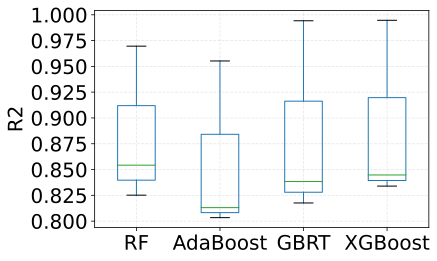

In [24]:
df_r2 = pd.DataFrame(r2)
df_r2.plot.box(fontsize=20)
plt.ylabel('R2', fontsize=20)
plt.grid(linestyle="--", alpha=0.3)
plt.savefig('C03.svg',dpi=300,bbox_inches="tight")
plt.show()

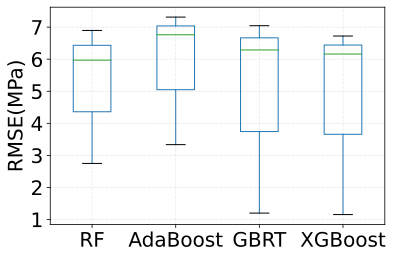

In [25]:
df_RMSE = pd.DataFrame(RMSE)
df_RMSE.plot.box(fontsize=20)
plt.ylabel('RMSE(MPa)', fontsize=20)
plt.grid(linestyle="--", alpha=0.3)
plt.savefig('C13.svg',dpi=300,bbox_inches="tight")
plt.show()

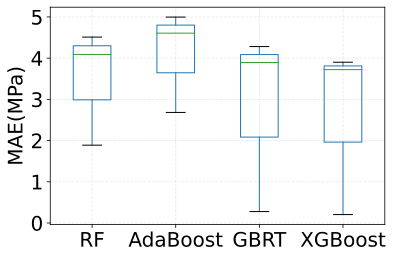

In [26]:
df_MAE = pd.DataFrame(MAE)
df_MAE.plot.box(fontsize=20)
plt.ylabel('MAE(MPa)', fontsize=20)
plt.grid(linestyle="--", alpha=0.3)
plt.savefig('C23.svg',dpi=300,bbox_inches="tight")
plt.show()